# Поиск Аномалий

In [29]:
import pandas as pd
import numpy as np
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD, InterQuartileRangeAD, LevelShiftAD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [32]:
# Загрузка данных из CSV файла
data = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data_api/ar_api_power.jtl', low_memory=False, parse_dates=True)

# Преобразование времени в читаемый формат, если необходимо
data['timeStamp'] = pd.to_datetime(data['timeStamp'], unit='ms')

# Фильтрация по столбцу sampleLabel
sample_labels = data['label'].unique()
sample_labels = np.delete(sample_labels, 0) # удалить первый результат

# Построим индекс по timeStamp 
data.set_index('timeStamp', inplace=True)

array(['GET_main', 'GET_card', 'POST_order'], dtype=object)

Количество аномалий (ThresholdAD) в GET_main: 0
Количество аномалий (ThresholdAD) в GET_card: 702
Error: ThresholdAD выявил слишком много аномалий
Количество аномалий (ThresholdAD) в POST_order: 1000
Error: ThresholdAD выявил слишком много аномалий


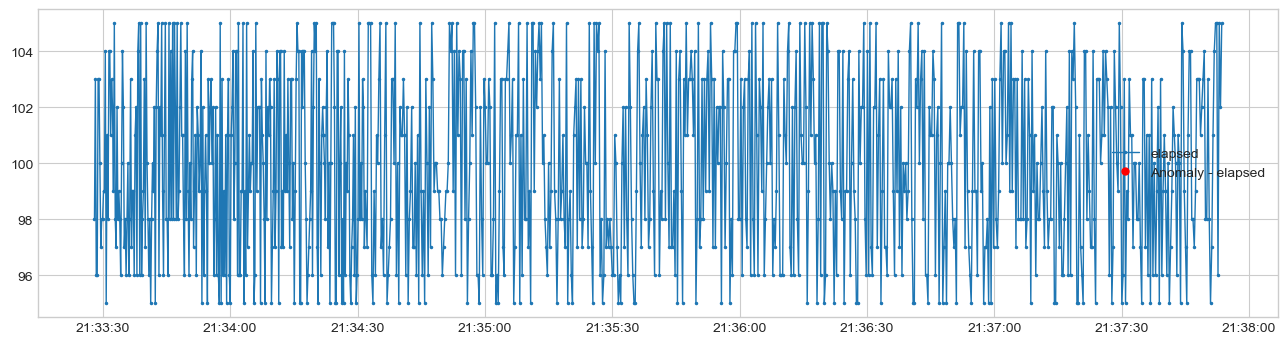

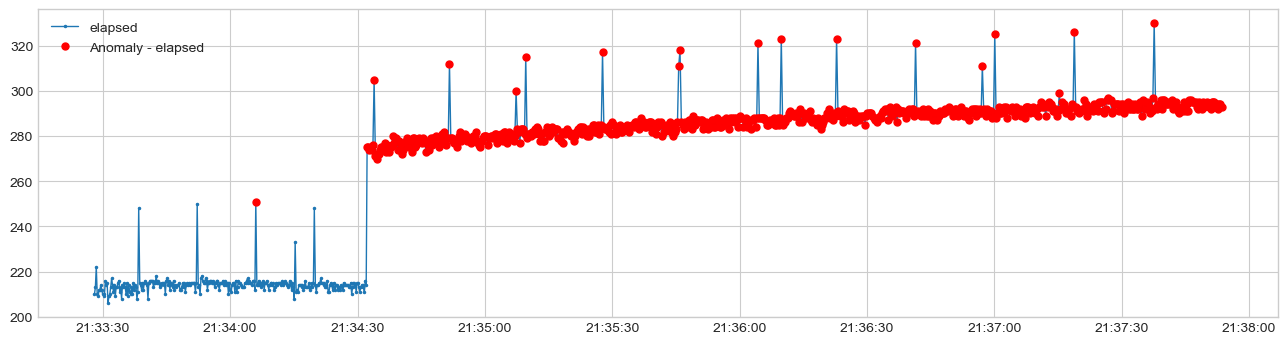

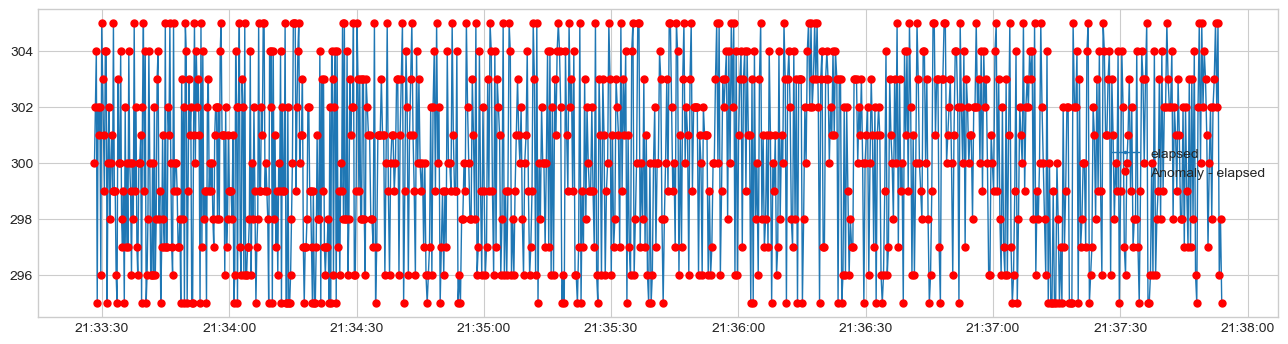

In [33]:
# ThresholdAD

for label in sample_labels:
    subset = data[data['label'] == label]
    subset = subset[['elapsed']]
    s = validate_series(subset)
        
    # Пороговый детектор
    threshold_ad = ThresholdAD(high=250, low=50)
    anomalies_threshold = threshold_ad.detect(s)
    count_threshold = int(anomalies_threshold.sum())
    
    # Визуализация результатов
    #plot(s, anomaly=anomalies_threshold, anomaly_color='red')
    
    # Вывод количества аномалий и сообщения об ошибке
    anomaly_threshold = 10  # Заданный порог количества аномалий
    plot(s, anomaly=anomalies_threshold, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker", legend=label);
    
    print(f"Количество аномалий (ThresholdAD) в {label}:", count_threshold)
    if count_threshold > anomaly_threshold:
        print("Error: ThresholdAD выявил слишком много аномалий")

    

# InterQuartileRangeAD
 

Количество аномалий (InterQuartileRangeAD) в GET_main: 185
Error: InterQuartileRangeAD выявил слишком много аномалий
Количество аномалий (InterQuartileRangeAD) в GET_card: 10
Количество аномалий (InterQuartileRangeAD) в POST_order: 169
Error: InterQuartileRangeAD выявил слишком много аномалий


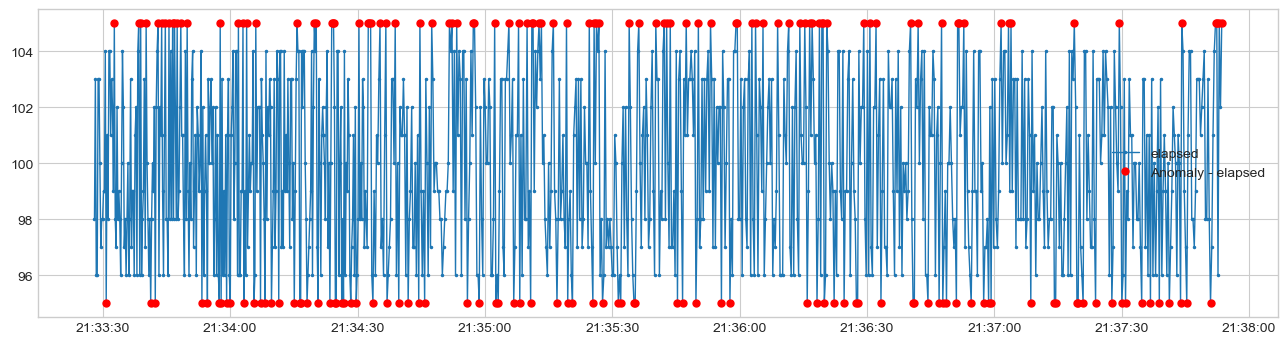

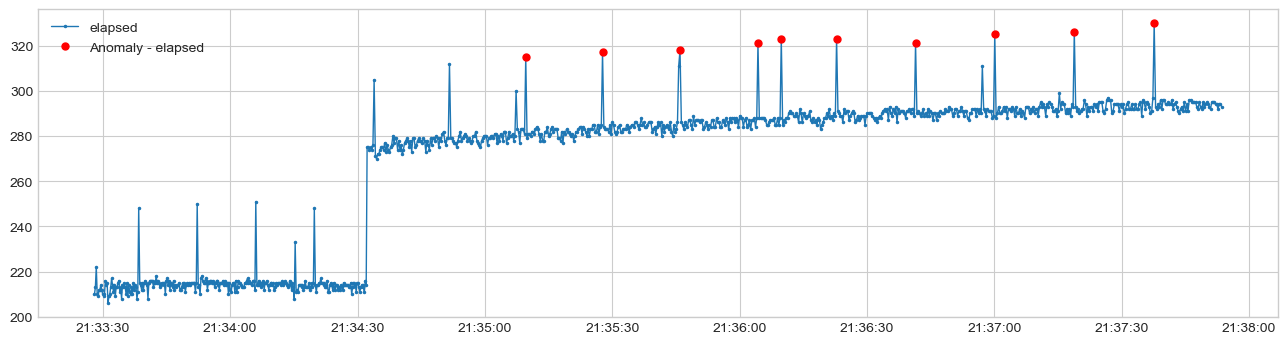

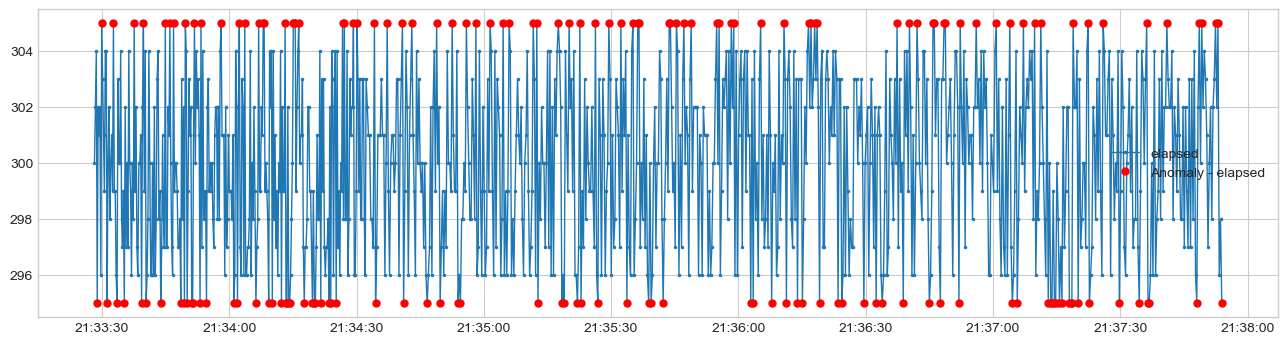

In [34]:
# InterQuartileRangeAD

for label in sample_labels:
    subset = data[data['label'] == label]
    subset = subset[['elapsed']]
    s = validate_series(subset)

    iqr_ad = InterQuartileRangeAD(c=0.3)
    anomalies = iqr_ad.fit_detect(s)
    count_threshold = int(anomalies.sum())
    
    # Вывод количества аномалий и сообщения об ошибке
    anomaly_threshold = 10  # Заданный порог количества аномалий
    plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker", legend=label);
    
    print(f"Количество аномалий (InterQuartileRangeAD) в {label}:", count_threshold)
    if count_threshold > anomaly_threshold:
        print("Error: InterQuartileRangeAD выявил слишком много аномалий")

    

# LevelShiftAD

Количество аномалий (LevelShiftAD) в GET_main: 0
Количество аномалий (LevelShiftAD) в GET_card: 5
Количество аномалий (LevelShiftAD) в POST_order: 0


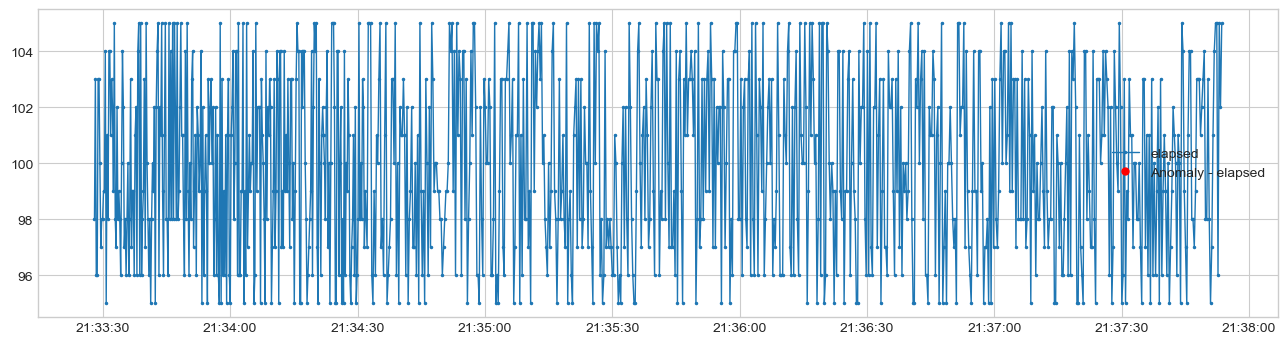

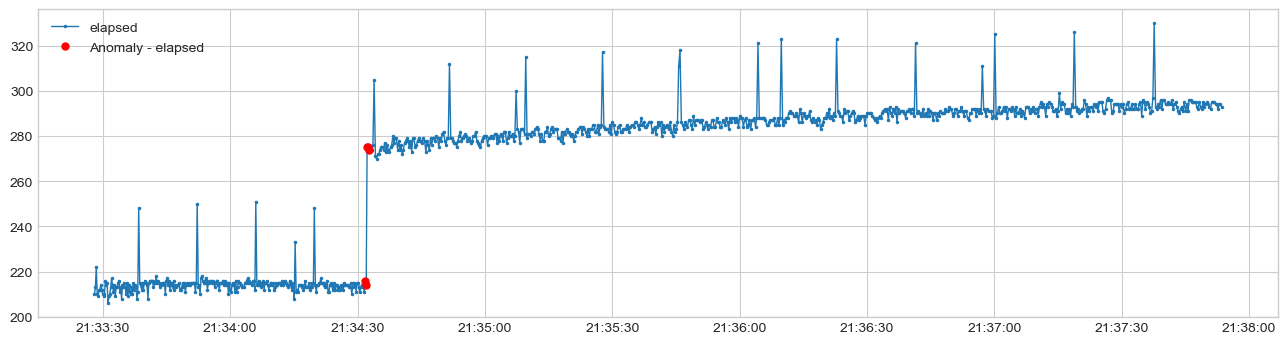

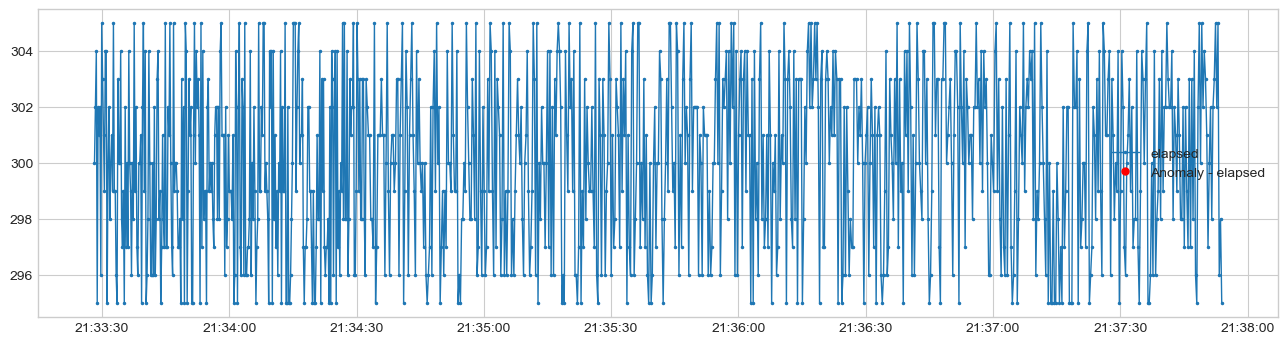

In [38]:
# LevelShiftAD

for label in sample_labels:
    subset = data[data['label'] == label]
    subset = subset[['elapsed']]
    s = validate_series(subset)

    level_shift_ad = LevelShiftAD(c=6.0, side='both', window=5)
    anomalies = level_shift_ad.fit_detect(s)
    count_threshold = int(anomalies.sum())
    
    # Вывод количества аномалий и сообщения об ошибке
    anomaly_threshold = 10  # Заданный порог количества аномалий
    #plot(s, anomaly=anomalies, anomaly_color='red')
    plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker", legend=label);
    
    print(f"Количество аномалий (LevelShiftAD) в {label}:", count_threshold)
    if count_threshold > anomaly_threshold:
        print("Error: LevelShiftAD выявил слишком много аномалий")

    

# VolatilityShiftAD

Количество аномалий (VolatilityShiftAD) в GET_main: 0
Количество аномалий (VolatilityShiftAD) в GET_card: 23
Error: VolatilityShiftAD выявил слишком много аномалий
Количество аномалий (VolatilityShiftAD) в POST_order: 0


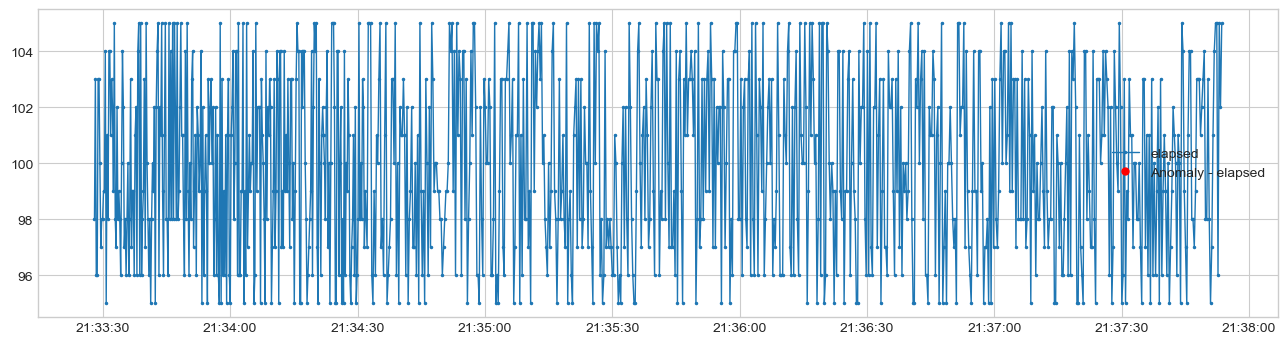

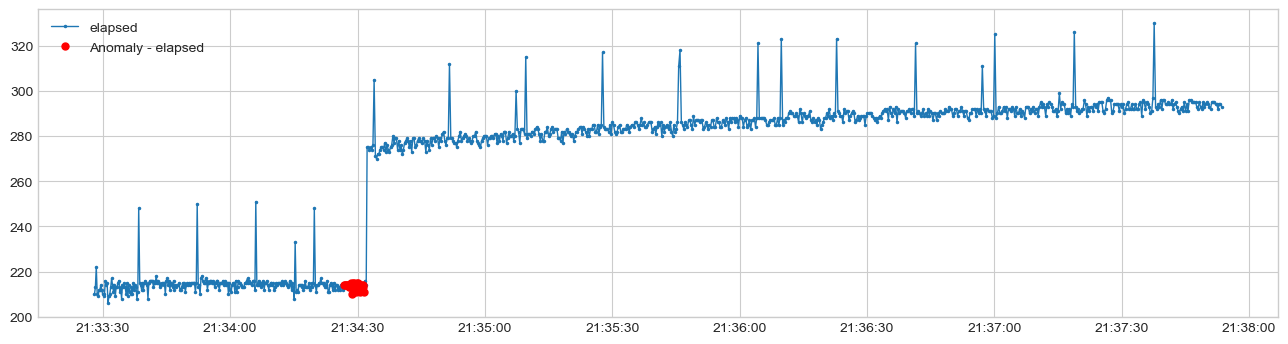

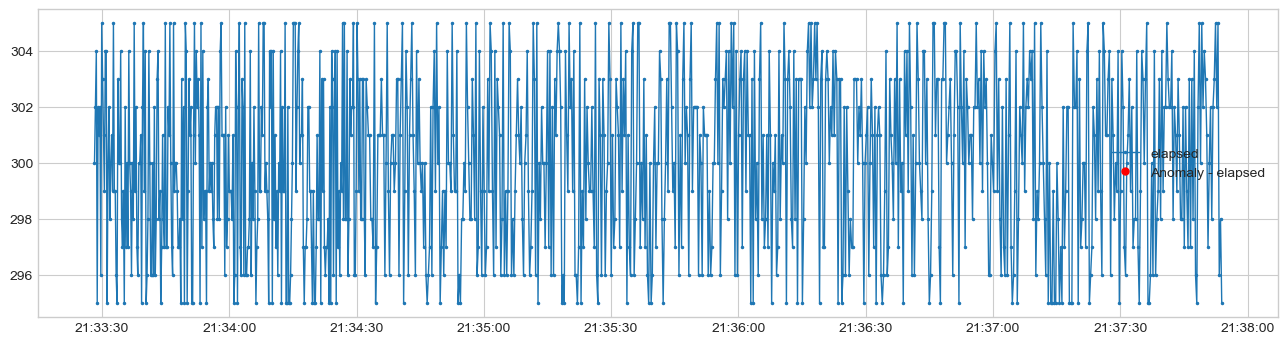

In [39]:
# VolatilityShiftAD

for label in sample_labels:
    subset = data[data['label'] == label]
    subset = subset[['elapsed']]
    s = validate_series(subset)

    volatility_shift_ad = VolatilityShiftAD(c=6.0, side='positive', window=30)
    anomalies = volatility_shift_ad.fit_detect(s)
    count_threshold = int(anomalies.sum())
    
    # Вывод количества аномалий и сообщения об ошибке
    anomaly_threshold = 10  # Заданный порог количества аномалий
    #plot(s, anomaly=anomalies, anomaly_color='red')
    plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker", legend=label);
    
    print(f"Количество аномалий (VolatilityShiftAD) в {label}:", count_threshold)
    if count_threshold > anomaly_threshold:
        print("Error: VolatilityShiftAD выявил слишком много аномалий")

    